In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
     ------                                   1.5/9.2 MB 47.9 MB/s eta 0:00:01
     -----------                              2.6/9.2 MB 33.6 MB/s eta 0:00:01
     -------------------                      4.5/9.2 MB 41.4 MB/s eta 0:00:01
     ----------------------------             6.6/9.2 MB 47.3 MB/s eta 0:00:01
     ------------------------------------     8.3/9.2 MB 48.5 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 45.2 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 39.2 MB/s eta 0:00:00
                                              0.0/44.0 MB ? eta -:--:--
     -                                        2.1/44.0 MB 66.4 MB/s eta 0:00:01
     ---                                      4.1/44.0 MB 65.6 MB/s eta 0:00:01
     -----                                    5.8/44.0 MB 62.0 MB/s eta 0:00:01
     -------                                  7.8/44.0 MB 55.6 M

In [3]:
pip install yfinance

  Using cached yfinance-0.2.22-py2.py3-none-any.whl (63 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import datetime as dt

import IPython.display

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf

import sklearn
import sklearn.linear_model
import sklearn.model_selection

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [14]:
yf.pdr_override()
symbol_aapl = 'AAPL'
symbol_meta = 'META'
symbol_gld = 'GLD'

start = dt.date(2014, 1, 1)
end = dt.date.today()

df_AAPL = pdr.get_data_yahoo(symbol_aapl, start, end)
df_META = pdr.get_data_yahoo(symbol_meta, start, end)
df_GLD = pdr.get_data_yahoo(symbol_gld, start, end)


df_AAPL.to_csv("data_stock/{}.csv".format(symbol_aapl))
df_META.to_csv("data_stock/{}.csv".format(symbol_meta))
df_GLD.to_csv("data_stock/{}.csv".format(symbol_gld))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


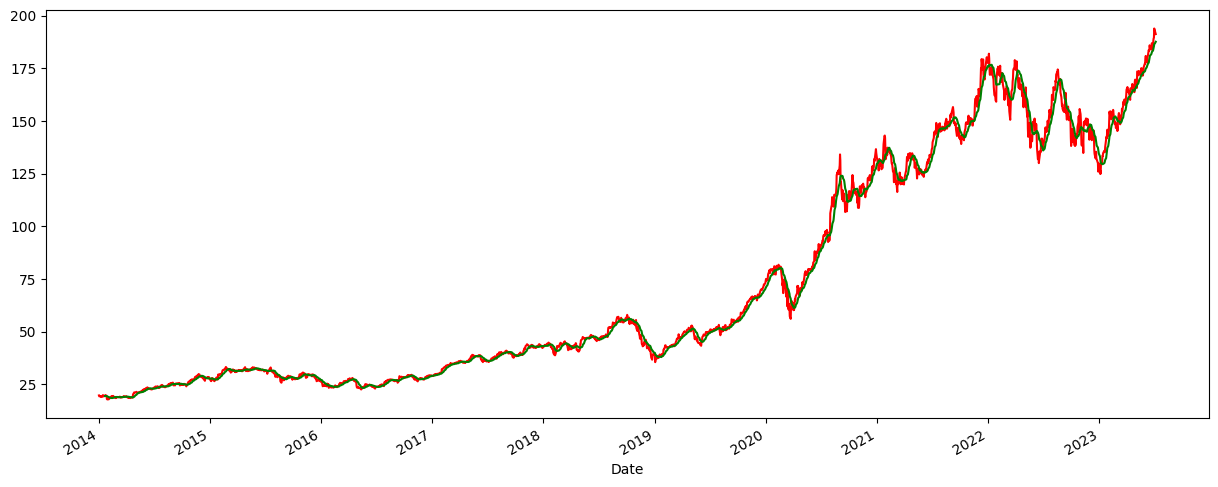

In [15]:
df_AAPL['SMA'] = df_AAPL['Close'].rolling(window=14).mean()
df_AAPL['Close'].plot(figsize=(15,6), color="red")
df_AAPL['SMA'].plot(figsize=(15,6), color="green")
plt.show()

In [16]:
df_AAPL['change'] = (((df_AAPL['Close'] - df_AAPL['Open'])) / (df_AAPL['Open']) * 100)
df_META['change'] = (((df_META['Close'] - df_META['Open'])) / (df_META['Open']) * 100)
df_GLD['change'] = (((df_GLD['Close'] - df_GLD['Open'])) / (df_GLD['Open']) * 100)
df_AAPL.tail(2).round(2)

,Open,High,Low,Close,Adj Close,Volume,SMA,change
Date,,,,,,,,
2023-07-03,193.78,193.88,191.76,192.46,192.46,31458200,187.10,-0.68
2023-07-05,191.57,192.98,190.62,191.33,191.33,46358709,187.68,-0.12


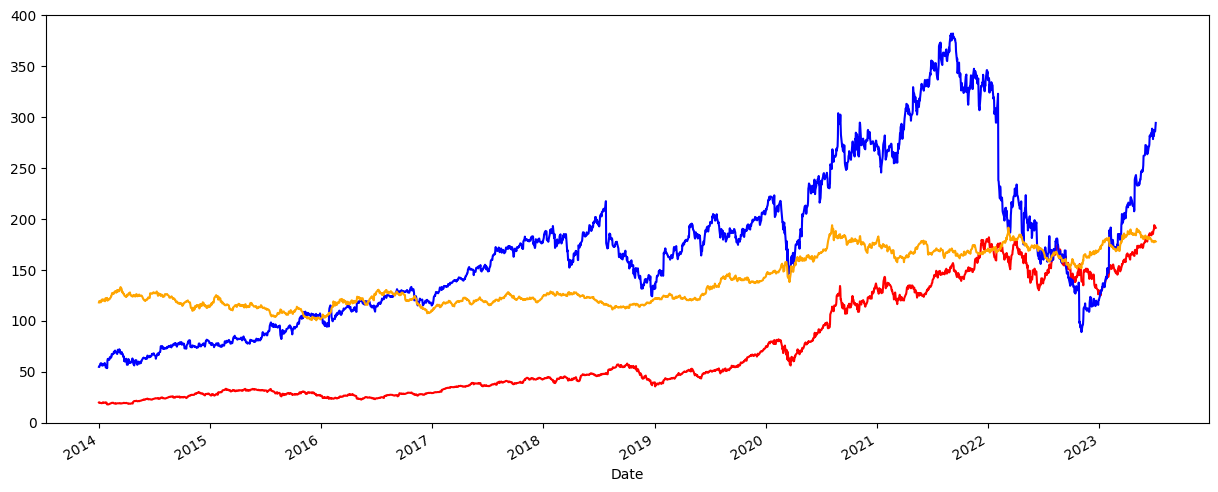

In [17]:
df_AAPL['Close'].plot(figsize=(15,6), color="red")
df_META['Close'].plot(figsize=(15,6), color="blue")
df_GLD['Close'].plot(figsize=(15,6), color="orange")
plt.show()

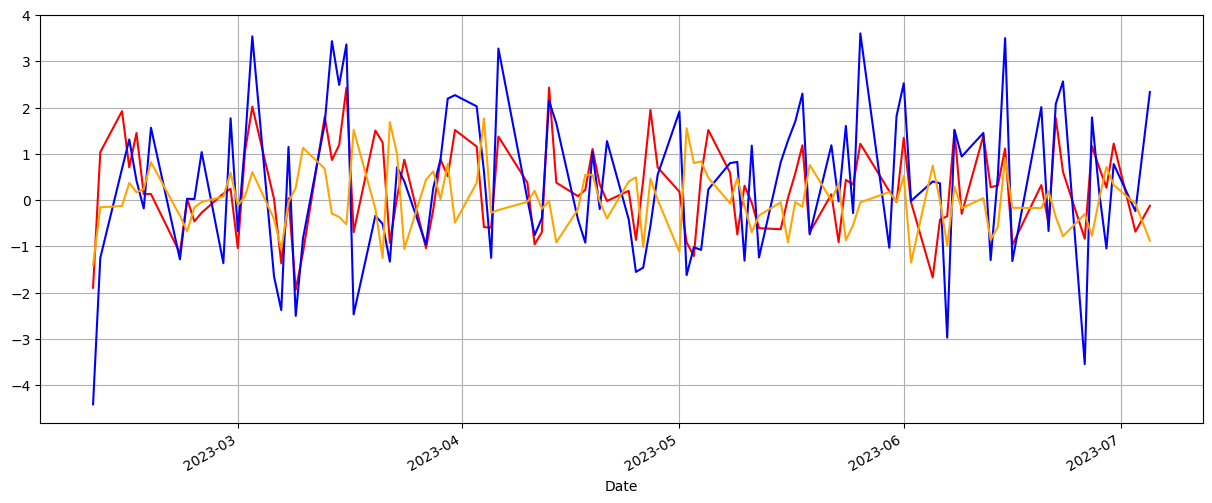

In [18]:
df_AAPL['change'].tail(100).plot(grid=True, figsize=(15,6), color="red")
df_META['change'].tail(100).plot(grid=True, figsize=(15,6), color="blue")
df_GLD['change'].tail(100).plot(grid=True, figsize=(15,6), color="orange")
plt.show()

In [19]:
df_AAPL['label'] = df_AAPL['Close'].shift(-30)
df_AAPL.tail(40)

,Open,High,Low,Close,Adj Close,Volume,SMA,change,label
Date,,,,,,,,,
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.260345,55962800,167.763571,0.591375,183.960007
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900,168.059285,-0.739670,187.000000
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500,168.552856,0.312099,186.679993
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700,169.176428,-0.057524,185.270004
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800,169.693571,-0.604762,188.059998
2023-05-15,173.160004,173.210007,171.470001,172.070007,172.070007,37266700,170.286428,-0.629474,189.250000
2023-05-16,171.990005,173.139999,171.800003,172.070007,172.070007,42110300,170.880001,0.046515,189.589996
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600,171.185715,0.570727,193.970001
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700,171.569287,1.184973,192.460007


In [27]:
# 機械学習(マシンラーニング)

# ラベル行を削除したデーターをXに代入
X = np.array(df_AAPL.drop(['label', 'SMA'], axis=1))
# 取りうる値の大小が著しく異なる特徴量を入れると結果が悪くなり、平均を引いて、標準偏差で割ってスケーリングする
X = sklearn.preprocessing.scale(X)

# 予測に使う過去30日間のデーター
predict_data = X[-30:]
# 過去30日を取り除いた入力データー
X = X[:-30]
y = np.array(df_AAPL['label'])
# 過去30日を取り除いた正解ラベル
y = y[:-30]

# 訓練データー80% 検証データー 20%に分ける
# 第一引数に入力データー、第２引数に正解ラベルの配列
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size = 0.2)

# 訓練データーを用いて学習する
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)

# 検証データーを用いて検証してみる
accuracy = lr.score(X_test, y_test)
accuracy

0.9749807785290633

In [28]:
# 予測する
predicted_data = lr.predict(predict_data)
predicted_data

array([184.41455015, 181.25484286, 181.52846212, 182.54457072,
       184.36912682, 187.34214159, 187.44446517, 187.88955335,
       189.36186336, 185.72943795, 187.10854606, 187.31031655,
       188.50688821, 191.08322128, 192.06075985, 193.27034766,
       192.38248693, 194.81251454, 193.67518782, 195.34096372,
       192.13225741, 194.85239157, 195.68214607, 194.83309598,
       196.63950602, 198.38064755, 199.801587  , 202.07596384,
       201.21232983, 200.73090531])

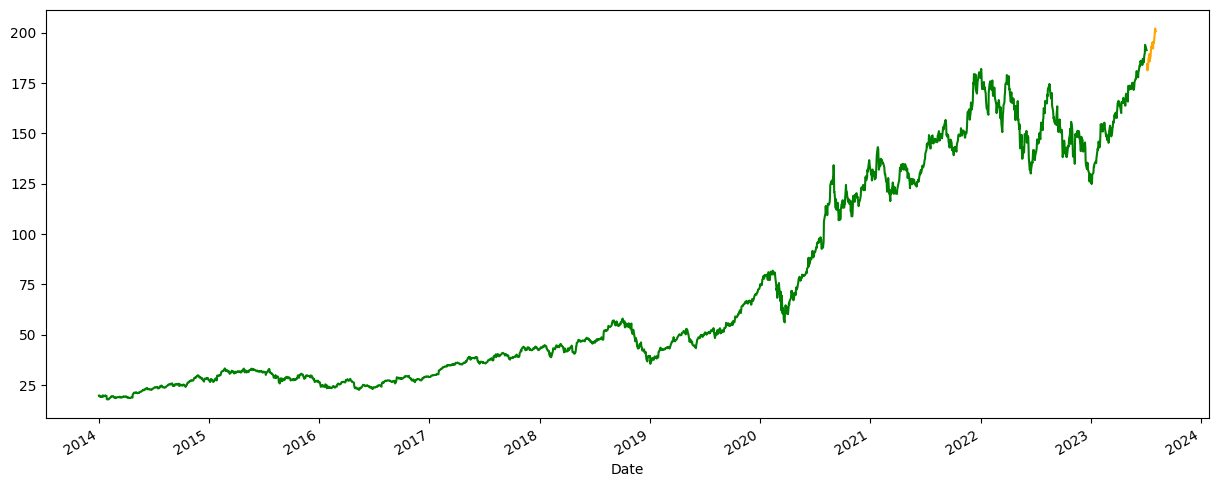

In [29]:
df_AAPL['Predict'] = np.nan

last_date = df_AAPL.iloc[-1].name

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = dt.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_AAPL.loc[next_date] = np.append([np.nan]* (len(df_AAPL.columns)-1), data)

df_AAPL['Close'].plot(figsize=(15,6), color="green")
df_AAPL['Predict'].plot(figsize=(15,6), color="orange")
plt.show()

In [30]:
if df_AAPL['Predict'][-1] > df_AAPL['Close'][-31]:
    print('Buy using REST API')
else:
    print('Sell using REST API')

Buy using REST API
